# Pleasantness ratings aquired during the localizer

In [5]:
import os
import pandas as pd
from src.my_settings import settings
sett = settings()

# increase pandas column number display
pd.set_option('display.max_columns', 500)

In [6]:
csv_path = os.path.join(sett['git_path'], 'data', 'psychopy')

# find all csv files in csv_path
files = [f for f in os.listdir(csv_path) if f.endswith('.csv')]

# print the number of files found
print(f'Found {len(files)} csv files in {csv_path}')

Found 22 csv files in /Users/alexandresayal/GitHub/musicnf-novelinterface/data/psychopy


In [23]:
# Iterate over all files and extract the relevant information

# create empty dataframe to store all data
df = pd.DataFrame()

for file in files:

    # read in csv file
    data = pd.read_csv(os.path.join(csv_path, file))

    # extract relevant information
    data = data[['image_rating_idx', 'music_samples', 'participant']]

    # remove rows with NaNs
    data = data.dropna()

    # extract the music type from the music_samples column by extracting the third element after spliting by '_'
    data['music_type'] = data['music_samples'].apply(lambda x: x.split('_')[2])

    # remove the music_samples column
    data = data.drop('music_samples', axis=1)

    # concat data to df
    df = pd.concat([df, data])

In [24]:
df

,image_rating_idx,participant,music_type
2,4.0,loc108,p
3,5.0,loc108,p
4,5.0,loc108,p
5,2.0,loc108,n
6,3.0,loc108,p
...,...,...,...
5,3.0,loc146,n
6,2.0,loc146,n
7,4.0,loc146,p
8,4.0,loc146,p


In [ ]:
# find unique values for image_rating_idx
df['image_rating_idx'].unique()

array([4., 5., 2., 3., 1.])

p-value: 1.4609822646944233e-17


([<matplotlib.axis.XTick at 0x308f04690>,
 [Text(0, 0, 'Pleasant'), Text(1, 0, 'Unpleasant')])

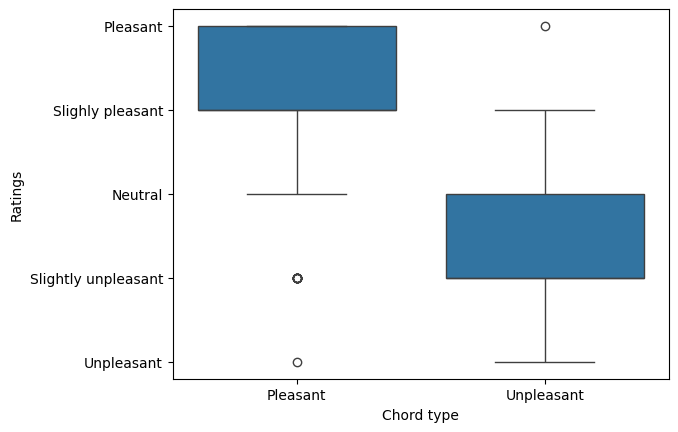

In [41]:
# stat test
from scipy.stats import mannwhitneyu

p_val = mannwhitneyu(df[df['music_type'] == 'p']['image_rating_idx'], df[df['music_type'] == 'n']['image_rating_idx']).pvalue

print(f'p-value: {p_val}')

# box plot the ratings for each music type (p and n)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='music_type', y='image_rating_idx', data=df)

# edit y ticks and labels
plt.yticks([1, 2, 3, 4, 5], ['Unpleasant', 'Slightly unpleasant', 'Neutral', 'Slighly pleasant', 'Pleasant'])
plt.ylabel('Ratings')

plt.xlabel('Chord type')
plt.xticks([0, 1], ['Pleasant', 'Unpleasant'])
